In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import sys, os, time, csv, glob, cv2

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## Settings
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision = 5, suppress = True)

Using plaidml.keras.backend backend.


In [2]:
train_normal = []
test_normal = []
train_smurf = []
test_smurf = []
train_ip = []
test_ip = []
train_port = []
test_port = []
train_nmap = []
test_nmap = []

for i in glob.glob('/Users/ryan/NSL CNN/2d-cnn/split_images/64x64_V2/60-40/train_normal/train_normal_equ_*.jpg', recursive=True):
    train_normal.append(cv2.imread(i, cv2.IMREAD_GRAYSCALE))

for j in glob.glob('/Users/ryan/NSL CNN/2d-cnn/split_images/64x64_V2/60-40/test_normal/test_normal_equ_*.jpg', recursive=True):
    test_normal.append(cv2.imread(j, cv2.IMREAD_GRAYSCALE))

for k in glob.glob('/Users/ryan/NSL CNN/2d-cnn/split_images/64x64_V2/60-40/train_smurf/train_smurf_equ_*.jpg', recursive=True):
    train_smurf.append(cv2.imread(k, cv2.IMREAD_GRAYSCALE))

for l in glob.glob('/Users/ryan/NSL CNN/2d-cnn/split_images/64x64_V2/60-40/test_smurf/test_smurf_equ_*.jpg', recursive=True):
    test_smurf.append(cv2.imread(l, cv2.IMREAD_GRAYSCALE))

for m in glob.glob('/Users/ryan/NSL CNN/2d-cnn/split_images/64x64_V2/60-40/train_ip/train_ip_equ_*.jpg', recursive=True):
    train_ip.append(cv2.imread(m, cv2.IMREAD_GRAYSCALE))

for n in glob.glob('/Users/ryan/NSL CNN/2d-cnn/split_images/64x64_V2/60-40/test_ip/test_ip_equ_*.jpg', recursive=True):
    test_ip.append(cv2.imread(n, cv2.IMREAD_GRAYSCALE))
    
for o in glob.glob('/Users/ryan/NSL CNN/2d-cnn/split_images/64x64_V2/60-40/train_port/train_port_equ_*.jpg', recursive=True):
    train_port.append(cv2.imread(o, cv2.IMREAD_GRAYSCALE))

for p in glob.glob('/Users/ryan/NSL CNN/2d-cnn/split_images/64x64_V2/60-40/test_port/test_port_equ_*.jpg', recursive=True):
    test_port.append(cv2.imread(p, cv2.IMREAD_GRAYSCALE))
    
for q in glob.glob('/Users/ryan/NSL CNN/2d-cnn/split_images/64x64_V2/60-40/train_nmap/train_nmap_equ_*.jpg', recursive=True):
    train_nmap.append(cv2.imread(q, cv2.IMREAD_GRAYSCALE))

for r in glob.glob('/Users/ryan/NSL CNN/2d-cnn/split_images/64x64_V2/60-40/test_nmap/test_nmap_equ_*.jpg', recursive=True):
    test_nmap.append(cv2.imread(r, cv2.IMREAD_GRAYSCALE))
    


train_normal = np.array(train_normal)
test_normal = np.array(test_normal)
train_smurf = np.array(train_smurf)
test_smurf = np.array(test_smurf)
train_ip = np.array(train_ip)
test_ip = np.array(test_ip)
train_port = np.array(train_port)
test_port = np.array(test_port)
train_nmap = np.array(train_nmap)
test_nmap = np.array(test_nmap)

In [14]:
print(f'Normal train\t{np.shape(train_normal)}\nNormal test\t{np.shape(test_normal)}\nSmurf train\t{np.shape(train_smurf)}\nSmurf test\t{np.shape(test_smurf)}\nIP train\t{np.shape(train_ip)}\nIP test\t\t{np.shape(test_ip)}')
print(f'Port train\t{np.shape(train_port)}\nPort test\t{np.shape(test_port)}\nNmap train\t{np.shape(train_nmap)}\nNmap test\t{np.shape(test_nmap)}')
# for i in range(0, 2):
#   plt.imshow(train_normal[i], cmap = 'gray')
#   plt.show()

# for i in train_normal:
#   print(i)


## MORE NORMAL DATA FOR TESTING TO GET SAME RATIO

Normal train	(1285, 64, 64)
Normal test	(857, 64, 64)
Smurf train	(92, 64, 64)
Smurf test	(61, 64, 64)
IP train	(4078, 64, 64)
IP test		(2719, 64, 64)
Port train	(1334, 64, 64)
Port test	(890, 64, 64)
Nmap train	(48, 64, 64)
Nmap test	(32, 64, 64)


In [4]:
## augmenting the data to create more images
## only run cell if needed

## vertically flip training images
vert_flip_train_attack = np.fliplr(train_attack)
vert_flip_train_normal = np.fliplr(train_normal)

## flip training images horizonatally
hor_flip_train_attack = np.rot90(train_attack, axes = (1,2), k = 2)
hor_flip_train_normal = np.rot90(train_normal, axes = (1,2), k = 2)

## rotate training images left and right once each
rotate90l_train_attack = np.rot90(train_attack, axes=(1, 2))
rotate90r_train_attack = np.rot90(train_normal, -1, axes=(1, 2))
rotate90l_train_normal = np.rot90(train_attack, axes=(1, 2))
rotate90r_train_normal = np.rot90(train_normal, -1, axes=(1, 2))



## vertically flip testing images
vert_flip_test_attack = np.fliplr(test_attack)
vert_flip_test_normal = np.fliplr(test_normal)

## flip testing images horizonatally
hor_flip_test_attack = np.rot90(test_attack, axes = (1,2), k = 2)
hor_flip_test_normal = np.rot90(test_normal, axes = (1,2), k = 2)

## rotate testing images left and right once each
rotate90l_test_attack = np.rot90(test_attack, axes=(1, 2))
rotate90r_test_attack = np.rot90(test_normal, -1, axes=(1, 2))
rotate90l_test_normal = np.rot90(test_attack, axes=(1, 2))
rotate90r_test_normal = np.rot90(test_normal, axes=(1, 2))


## stack all the original and augmented data to one single numpy array
train = np.vstack((train_attack, vert_flip_train_attack, hor_flip_train_attack, rotate90l_train_attack, rotate90r_train_attack,
                   train_normal, vert_flip_train_normal, hor_flip_train_normal, rotate90l_train_normal, rotate90r_train_normal))
test = np.vstack((test_attack, vert_flip_test_attack, hor_flip_test_attack, rotate90l_test_attack, rotate90r_test_attack,
                  test_normal, vert_flip_test_normal, hor_flip_test_normal, rotate90l_test_normal, rotate90r_test_normal))

## without rotate data
# train = np.vstack((train_attack, vert_flip_train_attack, hor_flip_train_attack,
#                    train_normal, vert_flip_train_normal, hor_flip_train_normal))
# test = np.vstack((test_attack, vert_flip_test_attack, hor_flip_test_attack,
#                   test_normal, vert_flip_test_normal, hor_flip_test_normal, rotate90l_test_normal, rotate90r_test_normal))                  

In [15]:
## if no augmented data is needed, run this cell
train = np.vstack((train_normal, train_smurf, train_ip, train_port, train_nmap))
test = np.vstack((test_normal, test_smurf, test_ip, test_port, test_nmap))

train.shape, test.shape

((6837, 64, 64), (4559, 64, 64))

In [16]:
train = train.reshape(-1,64,64,1)
test = test.reshape(-1,64,64,1)

train.shape, test.shape

((6837, 64, 64, 1), (4559, 64, 64, 1))

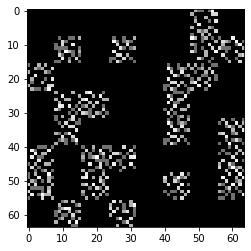

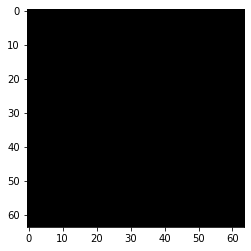

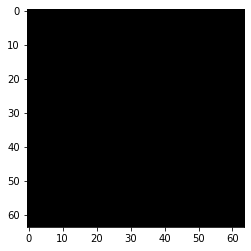

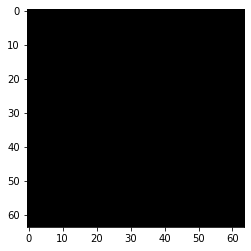

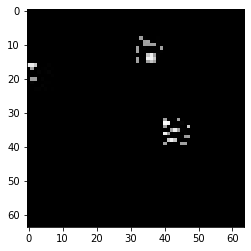

In [17]:
for i in range(0, 5):
    plt.imshow(train[i], cmap = 'gray')
    plt.show()

In [ ]:
print(f'Number of training images: {train.shape[0]}\nNumber of testing images {test.shape[0]}\n')
print(f'Number of training attack: {train_attack.shape[0]}\nNumber of vert flip train attack: {vert_flip_train_attack.shape[0]}\nNumber of training normal: {train_normal.shape[0]}\nNumber of vert flip training normal: {vert_flip_train_normal.shape[0]}\n')

print(f'Number of testing attack: {test_attack.shape[0]}\nNumber of vert flip test attack: {vert_flip_test_attack.shape[0]}\nNumber of hor flip test attack: {hor_flip_test_attack.shape[0]}\nNumber of test normal: {test_normal.shape[0]}\nNumber of vert flip test normal: {vert_flip_test_normal.shape[0]}\n' +
    f'Number of hor flip test normal: {hor_flip_test_normal.shape[0]}\nNumber of rotate90 left test normal: {rotate90l_test_normal.shape[0]}\nNumber of rotate90 right test normal: {rotate90r_test_normal.shape[0]}')

In [27]:
## create the training and testing data labels
## run if not using augmented data

training_labels = []

for i in range(0, train_normal.shape[0]):
    training_labels.append('Normal')

for j in range(0, train_smurf.shape[0]):
    training_labels.append('Smurf-DDoS')
    
for k in range(0, train_ip.shape[0]):
    training_labels.append('IP-Sweep')
    
for l in range(0, train_port.shape[0]):
    training_labels.append('Port-Sweep')
    
for m in range(0, train_nmap.shape[0]):
    training_labels.append('Nmap-Sweep')



testing_labels = []

for i in range(0, test_normal.shape[0]):
    testing_labels.append('Normal')

for j in range(0, test_smurf.shape[0]):
    testing_labels.append('Smurf-DDoS')
    
for k in range(0, test_ip.shape[0]):
    testing_labels.append('IP-Sweep')
    
for l in range(0, test_port.shape[0]):
    testing_labels.append('Port-Sweep')
    
for m in range(0, test_nmap.shape[0]):
    testing_labels.append('Nmap-Sweep')

In [6]:
## create the training and testing data labels
## run this cell if using augmented data

training_labels = []
## add the attack labels
for i in range(0, train_attack.shape[0] + vert_flip_train_attack.shape[0] + hor_flip_train_attack.shape[0] + rotate90l_train_attack.shape[0] + rotate90r_train_attack.shape[0]):
    training_labels.append('attack')

## add the normal labels
for j in range(train_attack.shape[0] + vert_flip_train_attack.shape[0] + hor_flip_train_attack.shape[0] + rotate90l_train_attack.shape[0] + rotate90r_train_attack.shape[0], train.shape[0]):
    training_labels.append('normal')



testing_labels = []
## add the attack labels
for k in range(0, test_attack.shape[0] + vert_flip_test_attack.shape[0] + hor_flip_test_attack.shape[0] + rotate90l_test_attack.shape[0] + rotate90r_test_attack.shape[0]):
    testing_labels.append('attack')

## add the normal labels
for l in range(test_attack.shape[0] + vert_flip_test_attack.shape[0] + hor_flip_test_attack.shape[0] + rotate90l_test_attack.shape[0] + rotate90r_test_attack.shape[0], test.shape[0]):
    testing_labels.append('normal')

In [20]:
## create the training and testing data labels
## run this cell if using augmented data but not with rotated data

training_labels = []
## add the attack labels
for i in range(0, train_attack.shape[0] + vert_flip_train_attack.shape[0] + hor_flip_train_attack.shape[0]):
    training_labels.append('attack')
a
## add the normal labels
for j in range(train_attack.shape[0] + vert_flip_train_attack.shape[0] + hor_flip_train_attack.shape[0], train.shape[0]):
    training_labels.append('normal')



testing_labels = []
## add the attack labels
for k in range(0, test_attack.shape[0] + vert_flip_test_attack.shape[0] + hor_flip_test_attack.shape[0] + rotate90l_train_normal.shape[0] + rotate90r_train_normal.shape[0]):
    testing_labels.append('attack')

## add the normal labels
for l in range(test_attack.shape[0] + vert_flip_test_attack.shape[0] + hor_flip_test_attack.shape[0] + rotate90l_train_normal.shape[0] + rotate90r_train_normal.shape[0], test.shape[0]):
    testing_labels.append('normal')

In [28]:
## create the dataframe for labels, then OHE the column
ytrain = pd.DataFrame(training_labels, columns = ['category'])
ytest = pd.DataFrame(testing_labels, columns = ['category'])

ytrain = pd.get_dummies(ytrain['category'])
ytest = pd.get_dummies(ytest['category'])

ytrain, ytest

(      IP-Sweep  Nmap-Sweep  Normal  Port-Sweep  Smurf-DDoS
 0            0           0       1           0           0
 1            0           0       1           0           0
 2            0           0       1           0           0
 3            0           0       1           0           0
 4            0           0       1           0           0
 ...        ...         ...     ...         ...         ...
 6832         0           1       0           0           0
 6833         0           1       0           0           0
 6834         0           1       0           0           0
 6835         0           1       0           0           0
 6836         0           1       0           0           0
 
 [6837 rows x 5 columns],
       IP-Sweep  Nmap-Sweep  Normal  Port-Sweep  Smurf-DDoS
 0            0           0       1           0           0
 1            0           0       1           0           0
 2            0           0       1           0           0
 3          

In [29]:
## shuffle the data to prevent pattern recognition
train, ytrain = sklearn.utils.shuffle(train, ytrain, random_state = 7)
test, ytest = sklearn.utils.shuffle(test, ytest, random_state = 7)

In [65]:
KERNEL_SIZE = [2,2]
IMAGE_SIZE = [64,64,1]

cnn = Sequential()

## convolution 1
cnn.add(Conv2D(16, (KERNEL_SIZE), padding="same", activation='relu', input_shape = (IMAGE_SIZE)))
cnn.add(MaxPooling2D(pool_size = (2,2)))
# cnn.add(Dropout(0.25))

## convolution 2
cnn.add(Conv2D(32, (KERNEL_SIZE), padding="same", activation='relu'))
cnn.add(MaxPooling2D(pool_size = (2,2)))
# cnn.add(Dropout(0.25))

## convolution 3
cnn.add(Conv2D(64, (KERNEL_SIZE), padding="same", activation='relu'))
cnn.add(MaxPooling2D(pool_size = (2,2)))
# cnn.add(Dropout(0.25))

## convolution 4
cnn.add(Conv2D(128, (KERNEL_SIZE), padding="same", activation='relu'))
cnn.add(MaxPooling2D(pool_size = (2,2)))
# cnn.add(Dropout(0.5))

## convolution 5
# cnn.add(Conv2D(128, (KERNEL_SIZE), padding="same", activation='relu'))
# cnn.add(MaxPooling2D(pool_size = (2,2)))
# # cnn.add(Dropout(0.5))

# ## convolution 6
# cnn.add(Conv2D(128, (KERNEL_SIZE), padding="same", activation='relu'))
# cnn.add(AveragePooling2D(pool_size = (2,2)))
# cnn.add(Dropout(0.5))

cnn.add(Flatten())

## dense
# cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(128, activation='relu'))
# cnn.add(Dense(64, activation='relu'))
# cnn.add(Dense(256, activation='relu'))
# cnn.add(Dropout(0.5))
cnn.add(Dense(5, activation = 'softmax'))

# callback = [EarlyStopping(monitor = 'accuracy', mode = 'max', patience = 2)]

cnn.compile(optimizer = keras.optimizers.Adam(), loss = 'categorical_crossentropy',
            metrics = ['accuracy'])


cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 64, 64, 16)        80        
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 32, 32, 32)        2080      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 8, 8, 128)         32896     
__________

In [66]:
start = time.time()
model_history = cnn.fit(train, ytrain, batch_size = 256, epochs = 250) ## smaller batch 128-256, 200-250 epochs
end = time.time()

os.system(f'say "training finished in {round(end - start, 2)} seconds"')
print(f'Training finished in {round(end - start, 2)}')

Epoch 1/250
6837/6837 [==============================] - 12s 2ms/step - loss: 4.1217 - acc: 0.5801
Epoch 2/250
6837/6837 [==============================] - 3s 448us/step - loss: 1.0186 - acc: 0.6488
Epoch 3/250
6837/6837 [==============================] - 3s 438us/step - loss: 0.8952 - acc: 0.6675
Epoch 4/250
6837/6837 [==============================] - 3s 433us/step - loss: 0.8619 - acc: 0.6861
Epoch 5/250
6837/6837 [==============================] - 3s 435us/step - loss: 0.8406 - acc: 0.6996
Epoch 6/250
6837/6837 [==============================] - 3s 448us/step - loss: 0.8245 - acc: 0.7065
Epoch 7/250
6837/6837 [==============================] - 3s 442us/step - loss: 0.8066 - acc: 0.7155
Epoch 8/250
6837/6837 [==============================] - 3s 444us/step - loss: 0.7844 - acc: 0.7272
Epoch 9/250
6837/6837 [==============================] - 3s 442us/step - loss: 0.7688 - acc: 0.7353
Epoch 10/250
6837/6837 [==============================] - 3s 441us/step - loss: 0.7568 - acc: 0.7389


dict_keys(['loss', 'acc'])


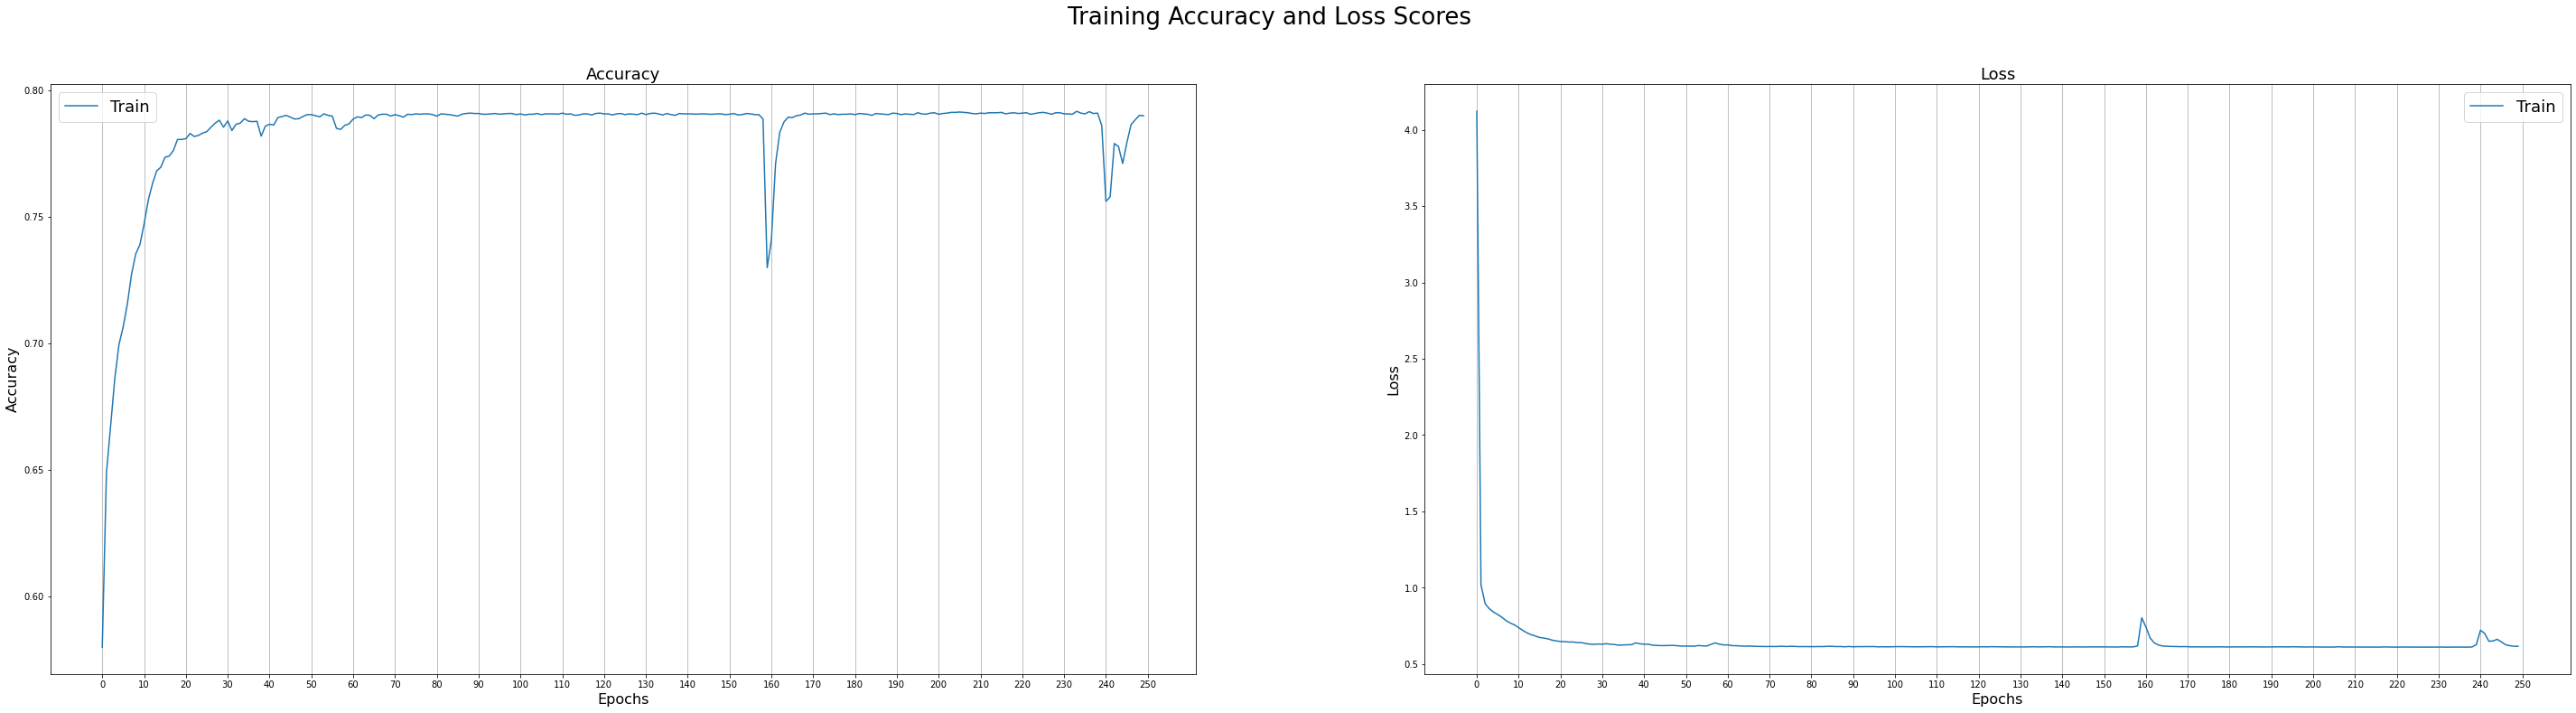

In [67]:
print(model_history.history.keys())

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(50,12))
fig.suptitle('Training Accuracy and Loss Scores', fontsize = 26)

axes[0].plot(model_history.history['acc'])
# axes[0].plot(model_history.history['val_acc'])
axes[0].set_title('Accuracy', fontsize = 18)
axes[0].set_ylabel('Accuracy', fontsize = 16)
axes[0].set_xlabel('Epochs', fontsize = 16)
axes[0].set_xticks(np.arange(0, 260, step = 10))
axes[0].grid(axis = 'x')
axes[0].legend(['Train', 'Test'], loc = 'best', fontsize = 18)

axes[1].plot(model_history.history['loss'])
# axes[1].plot(model_history.history['val_loss'])
axes[1].set_title('Loss', fontsize = 18)
axes[1].set_ylabel('Loss', fontsize = 16)
axes[1].set_xlabel('Epochs', fontsize = 16)
axes[1].set_xticks(np.arange(0, 260, step = 10))
axes[1].grid(axis = 'x')
axes[1].legend(['Train', 'Test'], loc = 'best', fontsize = 18)

In [68]:
loss, acc = cnn.evaluate(test, ytest, batch_size = 128, verbose = 0)
print(f'Loss = {round(loss, 4)}\tAccuracy = {round(acc, 4)*100}%')

Loss = 1.4052	Accuracy = 66.22%


In [69]:
preds = cnn.predict(test)
y_preds = np.argmax(preds, axis = 1)

print('\tIP\tNmap\tNormal\tPort\tSmurf\n')
preds[:20]

	IP	Nmap	Normal	Port	Smurf



array([[0.68268, 0.00448, 0.11937, 0.17565, 0.01783],
       [0.68268, 0.00448, 0.11937, 0.17565, 0.01783],
       [0.68268, 0.00448, 0.11937, 0.17565, 0.01783],
       [0.68268, 0.00448, 0.11937, 0.17565, 0.01783],
       [0.98398, 0.     , 0.00001, 0.01601, 0.     ],
       [0.9906 , 0.     , 0.     , 0.0094 , 0.     ],
       [0.68268, 0.00448, 0.11937, 0.17565, 0.01783],
       [0.68268, 0.00448, 0.11937, 0.17565, 0.01783],
       [0.68268, 0.00448, 0.11937, 0.17565, 0.01783],
       [0.68268, 0.00448, 0.11937, 0.17565, 0.01783],
       [0.68268, 0.00448, 0.11937, 0.17565, 0.01783],
       [0.68268, 0.00448, 0.11937, 0.17565, 0.01783],
       [0.99931, 0.     , 0.00001, 0.00068, 0.     ],
       [0.68268, 0.00448, 0.11937, 0.17565, 0.01783],
       [0.68268, 0.00448, 0.11937, 0.17565, 0.01783],
       [0.68268, 0.00448, 0.11937, 0.17565, 0.01783],
       [0.87424, 0.01092, 0.11338, 0.00146, 0.00001],
       [0.68268, 0.00448, 0.11937, 0.17565, 0.01783],
       [0.68268, 0.00448, 0.

In [70]:
def build_classifier():
    
    cnn = Sequential()

    ## convolution 1
    cnn.add(Conv2D(16, (KERNEL_SIZE), padding="same", activation='relu', input_shape = (IMAGE_SIZE)))
    cnn.add(MaxPooling2D(pool_size = (2,2)))
    # cnn.add(Dropout(0.5))

    ## convolution 2
    cnn.add(Conv2D(32, (KERNEL_SIZE), padding="same", activation='relu'))
    cnn.add(MaxPooling2D(pool_size = (2,2)))
    # cnn.add(Dropout(0.5))

    ## convolution 3
    cnn.add(Conv2D(64, (KERNEL_SIZE), padding="same", activation='relu'))
    cnn.add(MaxPooling2D(pool_size = (2,2)))
    # cnn.add(Dropout(0.5))

    ## convolution 4
    cnn.add(Conv2D(128, (KERNEL_SIZE), padding="same", activation='relu'))
    cnn.add(MaxPooling2D(pool_size = (2,2)))
    # # cnn.add(Dropout(0.5))
    
    ## convolution 4
#     cnn.add(Conv2D(16, (KERNEL_SIZE), padding="same", activation='relu'))
#     cnn.add(MaxPooling2D(pool_size = (2,2)))
    # # cnn.add(Dropout(0.5))

    cnn.add(Flatten())

    ## dense
#     cnn.add(Dense(256, activation='relu'))
    cnn.add(Dense(128, activation='relu'))
#     cnn.add(Dense(128, activation='relu'))
#     cnn.add(Dense(64, activation='relu'))
#     cnn.add(Dropout(0.5))
    cnn.add(Dense(5, activation = 'softmax'))

    # callback = [EarlyStopping(monitor = 'accuracy', mode = 'max', patience = 2)]

    cnn.compile(optimizer = keras.optimizers.Adam(), loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
    
    return cnn

classifier = KerasClassifier(build_fn = build_classifier, batch_size = 256, epochs = 250)

In [71]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, random_state = None)
score = cross_val_score(classifier, test, ytest, cv = kf)
print(f'Model Cross Validation: \n{round(score.mean(), 3)*100}%')
print(f'Model Cross Validation: \n{score}')

os.system('say "cross validation finished"')

Epoch 1/250
3647/3647 [==============================] - 8s 2ms/step - loss: 8.4526 - acc: 0.5596
Epoch 2/250
3647/3647 [==============================] - 2s 481us/step - loss: 1.3968 - acc: 0.6318
Epoch 3/250
3647/3647 [==============================] - 2s 471us/step - loss: 0.9832 - acc: 0.6594
Epoch 4/250
3647/3647 [==============================] - 2s 474us/step - loss: 0.8901 - acc: 0.6860
Epoch 5/250
3647/3647 [==============================] - 2s 488us/step - loss: 0.8536 - acc: 0.6934
Epoch 6/250
3647/3647 [==============================] - 2s 479us/step - loss: 0.8298 - acc: 0.7044
Epoch 7/250
3647/3647 [==============================] - 2s 438us/step - loss: 0.8087 - acc: 0.7107
Epoch 8/250
3647/3647 [==============================] - 2s 435us/step - loss: 0.7942 - acc: 0.7217
Epoch 9/250
3647/3647 [==============================] - 2s 438us/step - loss: 0.7662 - acc: 0.7370
Epoch 10/250
3647/3647 [==============================] - 2s 437us/step - loss: 0.7438 - acc: 0.7483
E

INFO:plaidml:Analyzing Ops: 68 of 286 operations complete


3648/3648 [==============================] - 16s 4ms/step - loss: 5.6068 - acc: 0.5600
Epoch 2/250
3648/3648 [==============================] - 2s 477us/step - loss: 1.3647 - acc: 0.6453
Epoch 3/250
3648/3648 [==============================] - 2s 497us/step - loss: 1.0179 - acc: 0.6658
Epoch 4/250
3648/3648 [==============================] - 2s 474us/step - loss: 0.8866 - acc: 0.6796
Epoch 5/250
3648/3648 [==============================] - 2s 479us/step - loss: 0.8473 - acc: 0.7012
Epoch 6/250
3648/3648 [==============================] - 2s 465us/step - loss: 0.8217 - acc: 0.7103
Epoch 7/250
3648/3648 [==============================] - 2s 468us/step - loss: 0.7980 - acc: 0.7253
Epoch 8/250
3648/3648 [==============================] - 2s 466us/step - loss: 0.7798 - acc: 0.7297
Epoch 9/250
3648/3648 [==============================] - 2s 468us/step - loss: 0.7583 - acc: 0.7421
Epoch 10/250
3648/3648 [==============================] - 2s 477us/step - loss: 0.7466 - acc: 0.7470
Epoch 11/250

0